In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

from collections import Counter


In [2]:
adata = sc.read_h5ad("kpmp.h5ad")

In [3]:
adata.obs.columns

Index(['nCount_RNA', 'nFeature_RNA', 'mypatients', 'percent.er', 'percent.mt',
       'degen.score', 'aEpi.score', 'aStr.score', 'cyc.score',
       'matrisome.score', 'collagen.score', 'glycoprotein.score',
       'proteoglycan.score', 'S.Score', 'G2M.Score', 'experiment', 'specimen',
       'condition.long', 'condition.l1', 'myconditions', 'donor_id',
       'region.l1', 'region.l2', 'percent.cortex', 'percent.medulla',
       'sample_tissue_type', 'id', 'pagoda_k100_infomap_coembed',
       'subclass.full', 'subclass.l3', 'subclass.l2', 'subclass.l1',
       'state.l2', 'state', 'class', 'structure', 'disease_ontology_term_id',
       'sex_ontology_term_id', 'development_stage_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'eGFR', 'BMI',
       'diabetes_history', 'hypertension', 'tissue_ontology_term_id',
       'organism_ontology_term_id', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'is_primary_data', 'suspension_type',
       'tissue_type

In [4]:
celltype_col="subclass.l1"
condition_col = "myconditions"

In [5]:
outname = "ctcond"

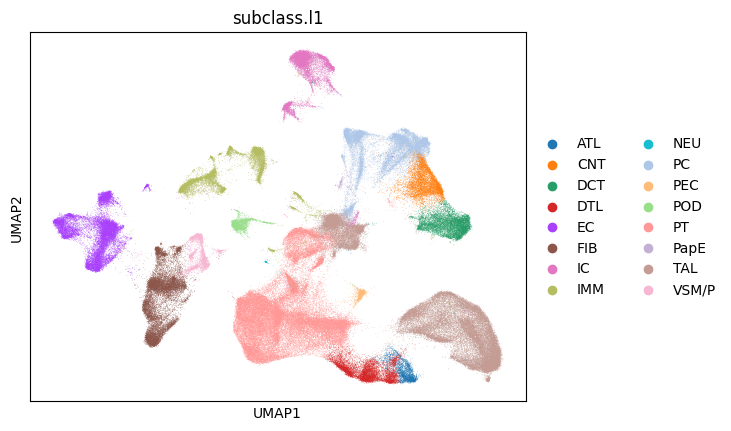

In [6]:
sc.pl.umap(adata, color=["subclass.l1"])

In [4]:
set(adata.obs[celltype_col])

{'ATL',
 'CNT',
 'DCT',
 'DTL',
 'EC',
 'FIB',
 'IC',
 'IMM',
 'NEU',
 'PC',
 'PEC',
 'POD',
 'PT',
 'PapE',
 'TAL',
 'VSM/P'}

In [6]:
adata.obs["ct_condition"] = adata.obs[celltype_col].astype(str) + "_" + adata.obs[condition_col].astype(str)
adata.obs["ct_condition"] = pd.Categorical(adata.obs["ct_condition"])

In [7]:
set(adata.obs["ct_condition"])

{'ATL_AKI',
 'ATL_COV_AKI',
 'ATL_DKD',
 'ATL_H_CKD',
 'ATL_Ref',
 'CNT_AKI',
 'CNT_COV_AKI',
 'CNT_DKD',
 'CNT_H_CKD',
 'CNT_Ref',
 'DCT_AKI',
 'DCT_COV_AKI',
 'DCT_DKD',
 'DCT_H_CKD',
 'DCT_Ref',
 'DTL_AKI',
 'DTL_COV_AKI',
 'DTL_DKD',
 'DTL_H_CKD',
 'DTL_Ref',
 'EC_AKI',
 'EC_COV_AKI',
 'EC_DKD',
 'EC_H_CKD',
 'EC_Ref',
 'FIB_AKI',
 'FIB_COV_AKI',
 'FIB_DKD',
 'FIB_H_CKD',
 'FIB_Ref',
 'IC_AKI',
 'IC_COV_AKI',
 'IC_DKD',
 'IC_H_CKD',
 'IC_Ref',
 'IMM_AKI',
 'IMM_COV_AKI',
 'IMM_DKD',
 'IMM_H_CKD',
 'IMM_Ref',
 'NEU_AKI',
 'NEU_COV_AKI',
 'NEU_DKD',
 'NEU_H_CKD',
 'NEU_Ref',
 'PC_AKI',
 'PC_COV_AKI',
 'PC_DKD',
 'PC_H_CKD',
 'PC_Ref',
 'PEC_AKI',
 'PEC_COV_AKI',
 'PEC_DKD',
 'PEC_H_CKD',
 'PEC_Ref',
 'POD_AKI',
 'POD_COV_AKI',
 'POD_DKD',
 'POD_H_CKD',
 'POD_Ref',
 'PT_AKI',
 'PT_COV_AKI',
 'PT_DKD',
 'PT_H_CKD',
 'PT_Ref',
 'PapE_AKI',
 'PapE_COV_AKI',
 'PapE_DKD',
 'PapE_H_CKD',
 'PapE_Ref',
 'TAL_AKI',
 'TAL_COV_AKI',
 'TAL_DKD',
 'TAL_H_CKD',
 'TAL_Ref',
 'VSM/P_AKI',
 'VSM/P_COV

/mnt/biosoft/software/python/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


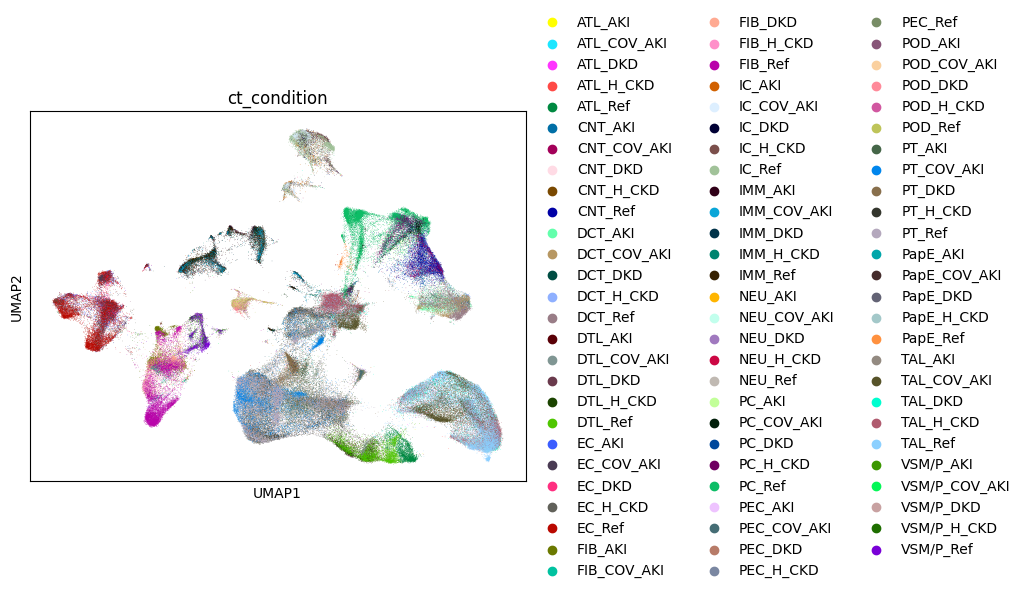

In [8]:
sc.pl.umap(adata, color=["ct_condition"])

/home/j/joppich/tmp/ipykernel_11122/822748533.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['myconditions']).sum().plot(
/home/j/joppich/tmp/ipykernel_11122/822748533.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['myconditions']).sum().plot(
/home/j/joppich/tmp/ipykernel_11122/822748533.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdf.groupby(['myconditions']).sum().plot(
/

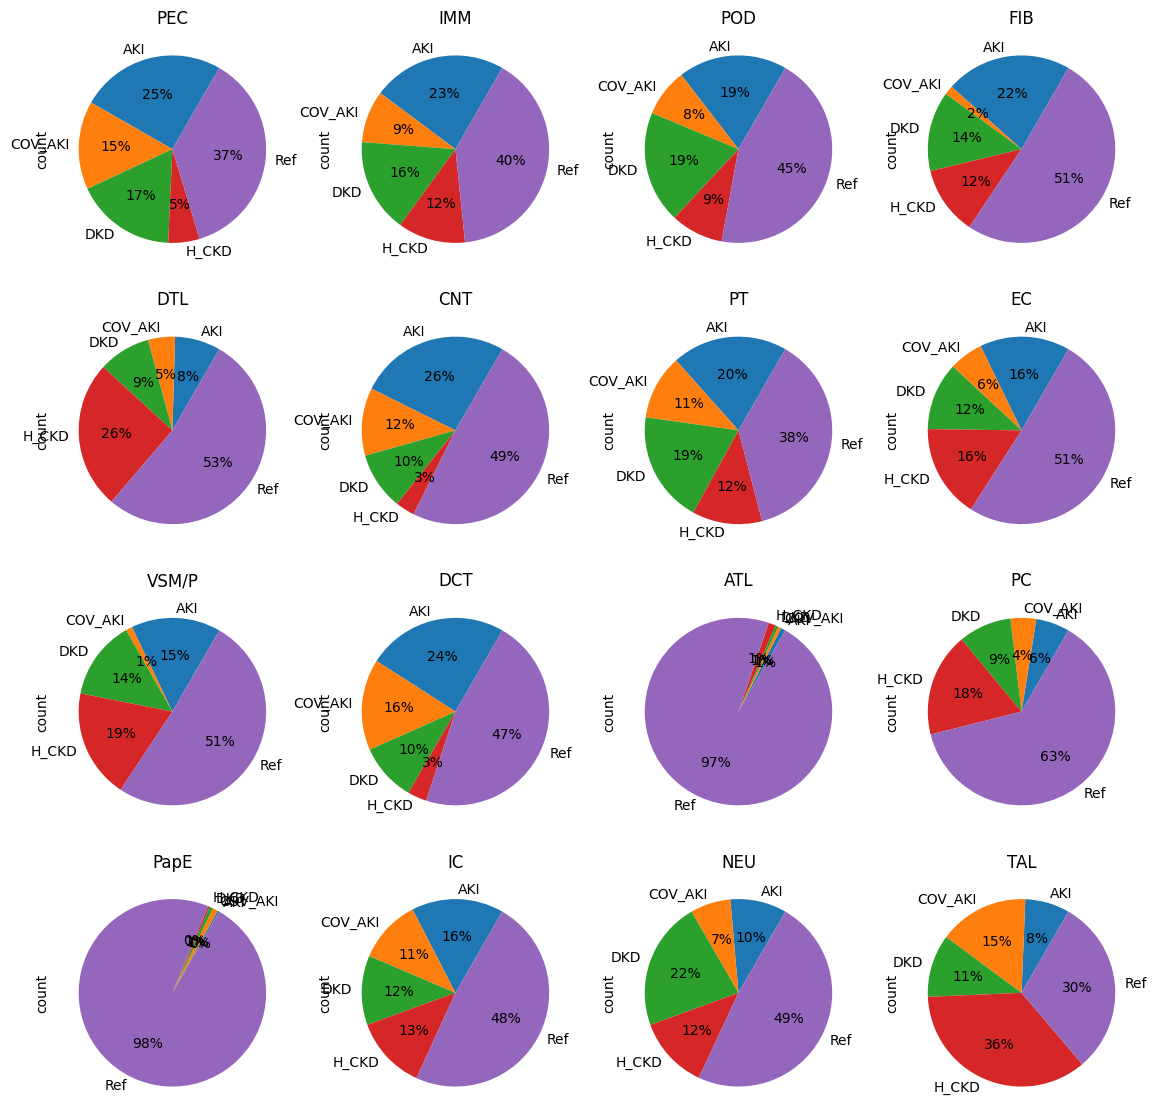

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4, figsize=(14, 14))
faxs = axs.flatten()

df_labels = adata.obs.loc[:,(celltype_col, condition_col)]
df_labels["count"] = 1

for gi, group in enumerate(set(df_labels[celltype_col])):
    gdf = df_labels[df_labels[celltype_col] == group]
    
    gdf.groupby([condition_col]).sum().plot( 
    kind='pie', y='count', autopct='%1.0f%%', startangle=60, ax=faxs[gi]) 
    faxs[gi].set_title(group)
    faxs[gi].get_legend().remove()
    
#faxs[gi+1].set_visible(False)


In [13]:
index2cellname = {i: x for i,x in enumerate(adata.obs.index)}
col2genename = {i: x for i,x in enumerate(adata.var.index)}
cellname2group = {cn: cg for cn, cg in zip(adata.obs.index, adata.obs["ct_condition"])}

group2cellcount = Counter()
for cn in cellname2group:
    group2cellcount[cellname2group[cn]] += 1

In [14]:
group2cellcount

Counter({'PT_Ref': 19433,
         'TAL_H_CKD': 15470,
         'TAL_Ref': 13258,
         'PT_AKI': 10294,
         'PC_Ref': 10030,
         'PT_DKD': 9934,
         'EC_Ref': 8876,
         'FIB_Ref': 8260,
         'TAL_COV_AKI': 6747,
         'PT_H_CKD': 6238,
         'PT_COV_AKI': 5773,
         'IC_Ref': 4806,
         'TAL_DKD': 4716,
         'IMM_Ref': 4512,
         'DTL_Ref': 4216,
         'DCT_Ref': 3812,
         'FIB_AKI': 3517,
         'CNT_Ref': 3415,
         'TAL_AKI': 3348,
         'ATL_Ref': 2865,
         'PC_H_CKD': 2863,
         'EC_H_CKD': 2826,
         'EC_AKI': 2716,
         'IMM_AKI': 2608,
         'FIB_DKD': 2233,
         'EC_DKD': 2049,
         'DTL_H_CKD': 2037,
         'DCT_AKI': 1979,
         'VSM/P_Ref': 1962,
         'FIB_H_CKD': 1920,
         'IMM_DKD': 1822,
         'CNT_AKI': 1810,
         'IC_AKI': 1576,
         'PC_DKD': 1461,
         'IMM_H_CKD': 1316,
         'DCT_COV_AKI': 1284,
         'IC_H_CKD': 1253,
         'IC_DKD':

In [16]:

def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

def sd():
    def sd_(x):
        return np.std(x)
    sd_.__name__ = "sd"
    return sd_

def enum():
    def enum_(x):
        return x.size
    enum_.__name__ = 'num'
    return enum_



In [17]:
coo = adata.X.tocoo(copy=False)
genedf = pd.DataFrame({'rowidx': coo.row, 'col': coo.col, 'data': coo.data})[['rowidx', 'col', 'data']]

In [18]:
genedf["cellname"] = genedf.rowidx.map(index2cellname)
genedf["gene"] = genedf.col.map(col2genename)
genedf["group"] = genedf.cellname.map(cellname2group)
genedf

,rowidx,col,data,cellname,gene,group
0,0,0,1.0,KB1_AAACCCAAGCCGATAG,A1BG,PT_DKD
1,0,20,3.0,KB1_AAACCCAAGCCGATAG,AAK1,PT_DKD
2,0,21,1.0,KB1_AAACCCAAGCCGATAG,AAMDC,PT_DKD
3,0,37,2.0,KB1_AAACCCAAGCCGATAG,ABCA1,PT_DKD
4,0,40,1.0,KB1_AAACCCAAGCCGATAG,ABCA13,PT_DKD
...,...,...,...,...,...,...
379664051,200337,29009,1.0,KBCVD4_TTTGTTGAGACCCGCT-1,ZNF529,EC_COV_AKI
379664052,200337,29150,1.0,KBCVD4_TTTGTTGAGACCCGCT-1,ZNF706,EC_COV_AKI
379664053,200337,29189,1.0,KBCVD4_TTTGTTGAGACCCGCT-1,ZNF77,EC_COV_AKI
379664054,200337,29199,1.0,KBCVD4_TTTGTTGAGACCCGCT-1,ZNF780A,EC_COV_AKI


In [19]:
genedf2 = genedf[genedf.gene == "ALB"]

In [20]:
genedf2

,rowidx,col,data,cellname,gene,group
7185,3,8155,1.0,KB1_AAACCCAGTAATGCGG,ALB,TAL_DKD
104481,51,8155,1.0,KB1_AAAGTCCCACGAGAAC,ALB,PT_DKD
156583,74,8155,2.0,KB1_AACAACCAGCAGGCAT,ALB,PT_DKD
670056,325,8155,1.0,KB1_AATGCCACAGAGTTGG,ALB,PT_DKD
705591,345,8155,1.0,KB1_AATGGCTTCTATCACT,ALB,EC_DKD
...,...,...,...,...,...,...
378887860,200029,8155,1.0,KBCVD4_TGCTCCAAGAGGCTGT-1,ALB,TAL_COV_AKI
379078996,200106,8155,1.0,KBCVD4_TGTCCACCAAGAGCTG-1,ALB,TAL_COV_AKI
379131114,200126,8155,1.0,KBCVD4_TGTGTGACAGTCTACA-1,ALB,TAL_COV_AKI
379489805,200265,8155,1.0,KBCVD4_TTGGGCGTCTCGCCTA-1,ALB,IMM_COV_AKI


In [21]:
aggdf = genedf.groupby(["group", "gene"])["data"].aggregate(["min", percentile(25), np.median, percentile(75), "max", "mean", enum(), sd()])
aggdf


min  percentile_25  median  percentile_75  max      mean  \
group     gene                                                                  
ATL_AKI   A1BG       1.0           1.00     1.0           1.00  1.0  1.000000   
          A1BG-AS1   1.0           1.00     1.0           1.00  1.0  1.000000   
          A2M        1.0           1.00     1.0           1.00  1.0  1.000000   
          A2ML1-AS1  1.0           1.00     1.0           1.00  1.0  1.000000   
          A4GALT     1.0           1.25     1.5           1.75  2.0  1.500000   
...                  ...            ...     ...            ...  ...       ...   
VSM/P_Ref ZYG11A     1.0           1.00     1.0           1.00  1.0  1.000000   
          ZYG11B     1.0           1.00     1.0           1.00  4.0  1.275773   
          ZYX        1.0           1.00     1.0           1.00  3.0  1.053571   
          ZZEF1      1.0           1.00     1.0           2.00  6.0  1.369478   
          ZZZ3       1.0           1.00     1.0           2.00  8.0  1.798799   

                     num        sd  
group     gene                      
ATL_AKI   A1BG         1  0.000000  
          A1BG-AS1     2  0.000000  
          A2M          1  0.000000  
          A2ML1-AS1    1  0.000000  
          A4GALT       2  0.500000  
...                  ...       ...  
VSM/P_Ref ZYG11A      21  0.000000  
          ZYG11B     388  0.603880  
          ZYX        112  0.261837  
          ZZEF1      498  0.717000  
          ZZZ3       666  1.188685  

[1614358 rows x 8 columns]

In [22]:
aggdf["group_cells"] = aggdf.index.get_level_values(0).map(group2cellcount)
aggdf["perc_expr"] = aggdf.num / aggdf.group_cells
aggdf


min  percentile_25  median  percentile_75  max      mean  \
group     gene                                                                  
ATL_AKI   A1BG       1.0           1.00     1.0           1.00  1.0  1.000000   
          A1BG-AS1   1.0           1.00     1.0           1.00  1.0  1.000000   
          A2M        1.0           1.00     1.0           1.00  1.0  1.000000   
          A2ML1-AS1  1.0           1.00     1.0           1.00  1.0  1.000000   
          A4GALT     1.0           1.25     1.5           1.75  2.0  1.500000   
...                  ...            ...     ...            ...  ...       ...   
VSM/P_Ref ZYG11A     1.0           1.00     1.0           1.00  1.0  1.000000   
          ZYG11B     1.0           1.00     1.0           1.00  4.0  1.275773   
          ZYX        1.0           1.00     1.0           1.00  3.0  1.053571   
          ZZEF1      1.0           1.00     1.0           2.00  6.0  1.369478   
          ZZZ3       1.0           1.00     1.0           2.00  8.0  1.798799   

                     num        sd  group_cells  perc_expr  
group     gene                                              
ATL_AKI   A1BG         1  0.000000           24   0.041667  
          A1BG-AS1     2  0.000000           24   0.083333  
          A2M          1  0.000000           24   0.041667  
          A2ML1-AS1    1  0.000000           24   0.041667  
          A4GALT       2  0.500000           24   0.083333  
...                  ...       ...          ...        ...  
VSM/P_Ref ZYG11A      21  0.000000         1962   0.010703  
          ZYG11B     388  0.603880         1962   0.197757  
          ZYX        112  0.261837         1962   0.057085  
          ZZEF1      498  0.717000         1962   0.253823  
          ZZZ3       666  1.188685         1962   0.339450  

[1614358 rows x 10 columns]

In [23]:
aggdf.to_csv("expression_{}_mean_df.tsv".format(outname), sep="\t")